**Online retail store dataset with certain columuns. We will start with understanding the data, then cleaning it, exploratory data analysis and then the customer segmentation analysis part.**

In [ ]:
import pandas as pd

data = pd.read_excel("/content/Online Retail.xlsx")

# Display the first few rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Convert InvoiceDate to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Drop rows with missing CustomerID
cleaned_data = data.dropna(subset=['CustomerID'])

# Verify that rows with missing CustomerID are dropped
missing_values_after_customerid_cleaning = cleaned_data.isnull().sum()
cleaned_data.head(), missing_values_after_customerid_cleaning

(  InvoiceNo StockCode                          Description  Quantity  \
 0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
 1    536365     71053                  WHITE METAL LANTERN         6   
 2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
 3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
 4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
 
           InvoiceDate  UnitPrice  CustomerID         Country  
 0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
 1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
 2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
 3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
 4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  ,
 InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64)

In [ ]:
# Basic statistics of the dataset
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


**EXPLORATORY DATA ANALYSIS**

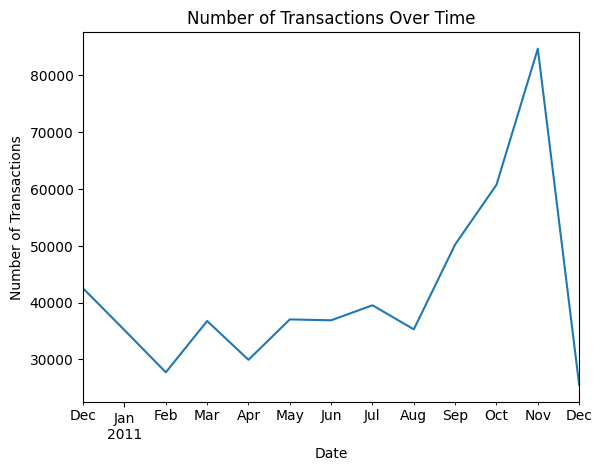

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of transactions over time
data.set_index('InvoiceDate').resample('M')['InvoiceNo'].count().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

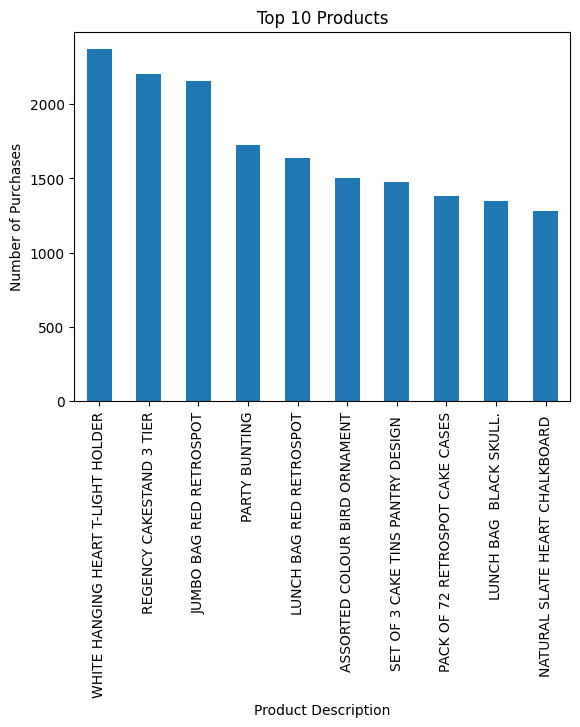

In [ ]:
# Analyze the most popular products
top_products = data['Description'].value_counts().head(10)
top_products.plot(kind='bar')
plt.title('Top 10 Products')
plt.xlabel('Product Description')
plt.ylabel('Number of Purchases')
plt.show()

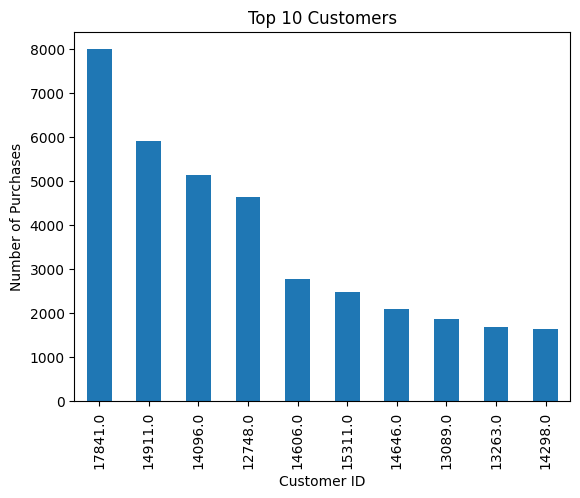

In [ ]:
# Analyze customer purchase patterns
top_customers = data['CustomerID'].value_counts().head(10)
top_customers.plot(kind='bar')
plt.title('Top 10 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.show()

In [ ]:
#LETS DO ANALYSIS OF DATA COUNTRY-WISE

transactions_by_country = cleaned_data.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
print("TRANSACTIONS BY COUNTRIES(TOP 10)","\n",transactions_by_country.head(10))

TRANSACTIONS BY COUNTRIES(TOP 10) 
 Country
United Kingdom    19857
Germany             603
France              458
EIRE                319
Belgium             119
Spain               105
Netherlands         101
Switzerland          71
Portugal             70
Australia            69
Name: InvoiceNo, dtype: int64


In [ ]:
quantity_by_country = cleaned_data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
print("QUANTITIES PURCHASED BY COUNTRIES(TOP 10)","\n",quantity_by_country.head(10))

QUANTITIES PURCHASED BY COUNTRIES(TOP 10) 
 Country
United Kingdom    4008533
Netherlands        200128
EIRE               136329
Germany            117448
France             109848
Australia           83653
Sweden              35637
Switzerland         29778
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


In [ ]:
cleaned_data['TotalPrice'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']
revenue_by_country = cleaned_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print(revenue_by_country.head(10))

<ipython-input-20-a4bc93412e3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['TotalPrice'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']


Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalPrice, dtype: float64


From above EDA we can conclude certain things:
1.   NOV 2011 was the month with most transactions followed by OCT AND SEPT.
2.   Top products were: WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT.
3.   UK was the country with most transactions amd quantities purchased.



**NOW WE WILL ANALYSE CUSTOMERS BY RFM-ANALYSIS TECHNIQUE**

In [ ]:
# Define a reference date for Recency calculation (typically the last date in the dataset)
reference_date = cleaned_data['InvoiceDate'].max()

# Calculate RFM metrics
rfm_table = cleaned_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

# Display the RFM table
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40


In [ ]:
# Assign scores to Recency, Frequency, and Monetary values
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 5, labels=range(5, 0, -1))
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 5, labels=range(1, 6))
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 5, labels=range(1, 6))

# Calculate the overall RFM score
rfm_table['RFM_Score'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)

rfm_table.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346.0,325,2,0.00,1,2,1,121
12347.0,1,7,4310.00,5,4,5,545
12348.0,74,4,1797.24,2,3,4,234
12349.0,18,1,1757.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112


In [ ]:
# Define segments based on RFM scores
def segment_customer(row):
    if row['RFM_Score'] == '555':
        return 'Best Customers'
    elif row['R_Score'] >= 4 and row['F_Score'] >= 4:
        return 'Loyal Customers'
    elif row['R_Score'] >= 4:
        return 'Recent Customers'
    elif row['F_Score'] >= 4:
        return 'Frequent Customers'
    elif row['M_Score'] >= 4:
        return 'Big Spenders'
    else:
        return 'Other Customers'

rfm_table['Customer_Segment'] = rfm_table.apply(segment_customer, axis=1)

# Display the RFM table with customer segments
rfm_table.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Customer_Segment
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,2,1,121,Other Customers
12347.0,1,7,4310.00,5,4,5,545,Loyal Customers
12348.0,74,4,1797.24,2,3,4,234,Big Spenders
12349.0,18,1,1757.55,4,1,4,414,Recent Customers
12350.0,309,1,334.40,1,1,2,112,Other Customers


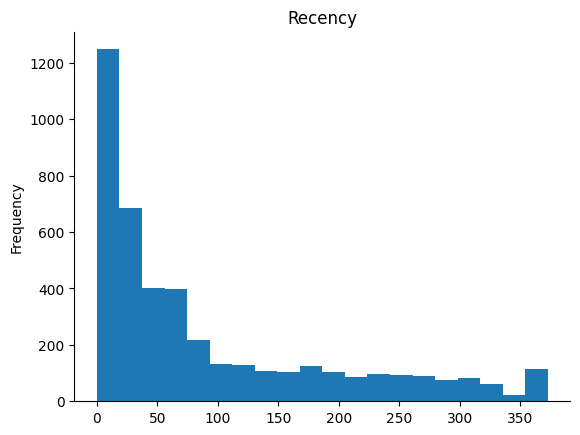

In [ ]:
#PLOTTING RECENCY

rfm_table['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

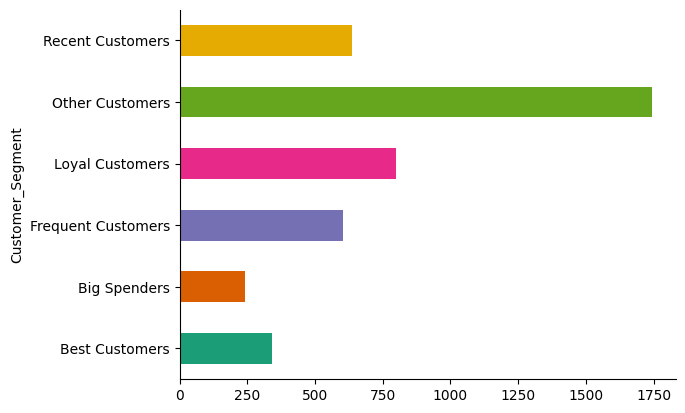

In [ ]:
#Customer_Segment

import seaborn as sns
rfm_table.groupby('Customer_Segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-38-e730925534d2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(rfm_table, x='Recency', y='Customer_Segment', inner='box', palette='Dark2')


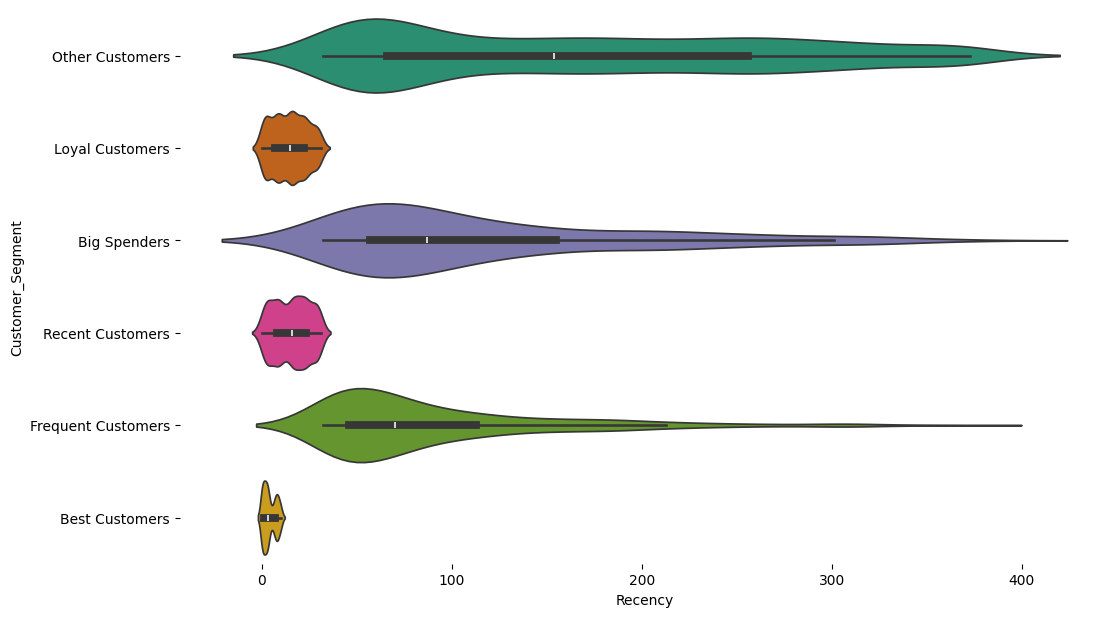

In [ ]:
#Customer_Segment vs Recency

figsize = (12, 1.2 * len(rfm_table['Customer_Segment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(rfm_table, x='Recency', y='Customer_Segment', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
cleaned_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


**DATA DONT CONTAIN FEEDBACKS, SO WE WILL GENERATE ONE AND THEN ANALYSE THEM**

In [ ]:
# Generate fake feedback
num_samples = len(cleaned_data)
fake_feedback = [np.random.choice(['Great product!', 'Poor quality...', 'Fast shipping', 'Item as described', 'Would buy again'], 1)[0] for _ in range(num_samples)]

# Add fake feedback column to the DataFrame
cleaned_data['Feedback'] = fake_feedback

# Now 'Feedback' column contains randomly generated feedback
cleaned_data.head()

<ipython-input-41-66f4d91f4df7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Feedback'] = fake_feedback


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Feedback
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Great product!
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Great product!
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Fast shipping
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Would buy again
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Poor quality...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(cleaned_data['Description'].values.astype('U'))  # Convert to Unicode strings

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Topic Modeling (LDA)
num_topics = 3
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topics = lda_model.fit_transform(tfidf_matrix)

In [ ]:
from sklearn.cluster import KMeans

# Clustering (KMeans)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(lda_topics)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-48-1a170a8e0857>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Cluster'] = kmeans_clusters


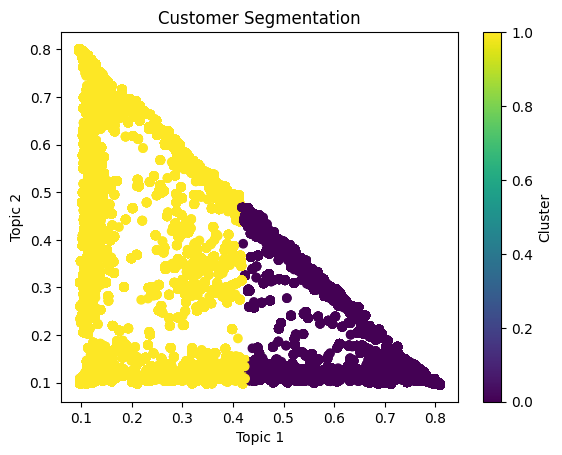

In [ ]:
# Add cluster labels to DataFrame
cleaned_data['Cluster'] = kmeans_clusters

# Visualize clusters
plt.scatter(lda_topics[:, 0], lda_topics[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel('Topic 1')
plt.ylabel('Topic 2')
plt.title('Customer Segmentation')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Analyze clusters
cluster_counts = cleaned_data['Cluster'].value_counts()
print("Cluster Counts:\n", cluster_counts)

Cluster Counts:
 Cluster
1    262525
0    144304
Name: count, dtype: int64


In [ ]:
# Print cluster details
for cluster_id in range(num_clusters):
    cluster_data = cleaned_data[cleaned_data['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} Details:")
    print(cluster_data[['InvoiceNo', 'CustomerID', 'Description', 'Feedback']])


Cluster 0 Details:
       InvoiceNo  CustomerID                      Description  \
1         536365     17850.0              WHITE METAL LANTERN   
7         536366     17850.0           HAND WARMER UNION JACK   
8         536366     17850.0        HAND WARMER RED POLKA DOT   
15        536367     13047.0    BOX OF VINTAGE JIGSAW BLOCKS    
16        536367     13047.0   BOX OF VINTAGE ALPHABET BLOCKS   
...          ...         ...                              ...   
541902    581587     12680.0              SPACEBOY LUNCH BOX    
541903    581587     12680.0      CHILDRENS CUTLERY SPACEBOY    
541905    581587     12680.0     CHILDREN'S APRON DOLLY GIRL    
541906    581587     12680.0    CHILDRENS CUTLERY DOLLY GIRL    
541907    581587     12680.0  CHILDRENS CUTLERY CIRCUS PARADE   

                 Feedback  
1          Great product!  
7         Poor quality...  
8          Great product!  
15      Item as described  
16         Great product!  
...                   ...  
541